# Nonsquare matrices

Suppose we have a $3 * 2$ matrix:

$$
A = \begin{pmatrix} 3 & 1 \\ 4 & 1 \\ 5 & 9 \end{pmatrix}
$$


Remeber, the we can interpret the first column as the point where $\hat{i}$ lands and the second column as where $\hat{j}$ lands. This means that our transformation is mapping all our Euclidian space onto a volume.

The column space of this matrix (the space of where all the vector will land), is a 2D plane slicing through the orign. But the matrix is still full rank, since the number of dimensions in the column space is the same as the number of dimensions in the input space ($2$).

<!-- Then the equation will become:

$$
A\vec{x} = \vec{v} \\
\begin{pmatrix} 3 & 1 \\ 4 & 1 \\ 5 & 9 \end{pmatrix} * \begin{pmatrix} x \\ y \end{pmatrix} = \vec{v} \\
\begin{pmatrix} 3x + y \\ 4x + y \\ 5x + 9y \end{pmatrix} = \vec{v}
$$ -->

Likewise, if we see a $3 * 2$ matrix:

$$ 
A = \begin{pmatrix} 3 & 1 & 4 \\ 1 & 5 & 9 \end{pmatrix}
$$

we know that we are mapping 3D space (we have 3 column, since 3 versors in the input basis) onto a 2D space (we have 2 rows, hence a 2 dimension column space at best). 
We can also have transformations from 2 dimentions onto a 1 dimension and tranformations from 1 dimension to 2 dimensions.


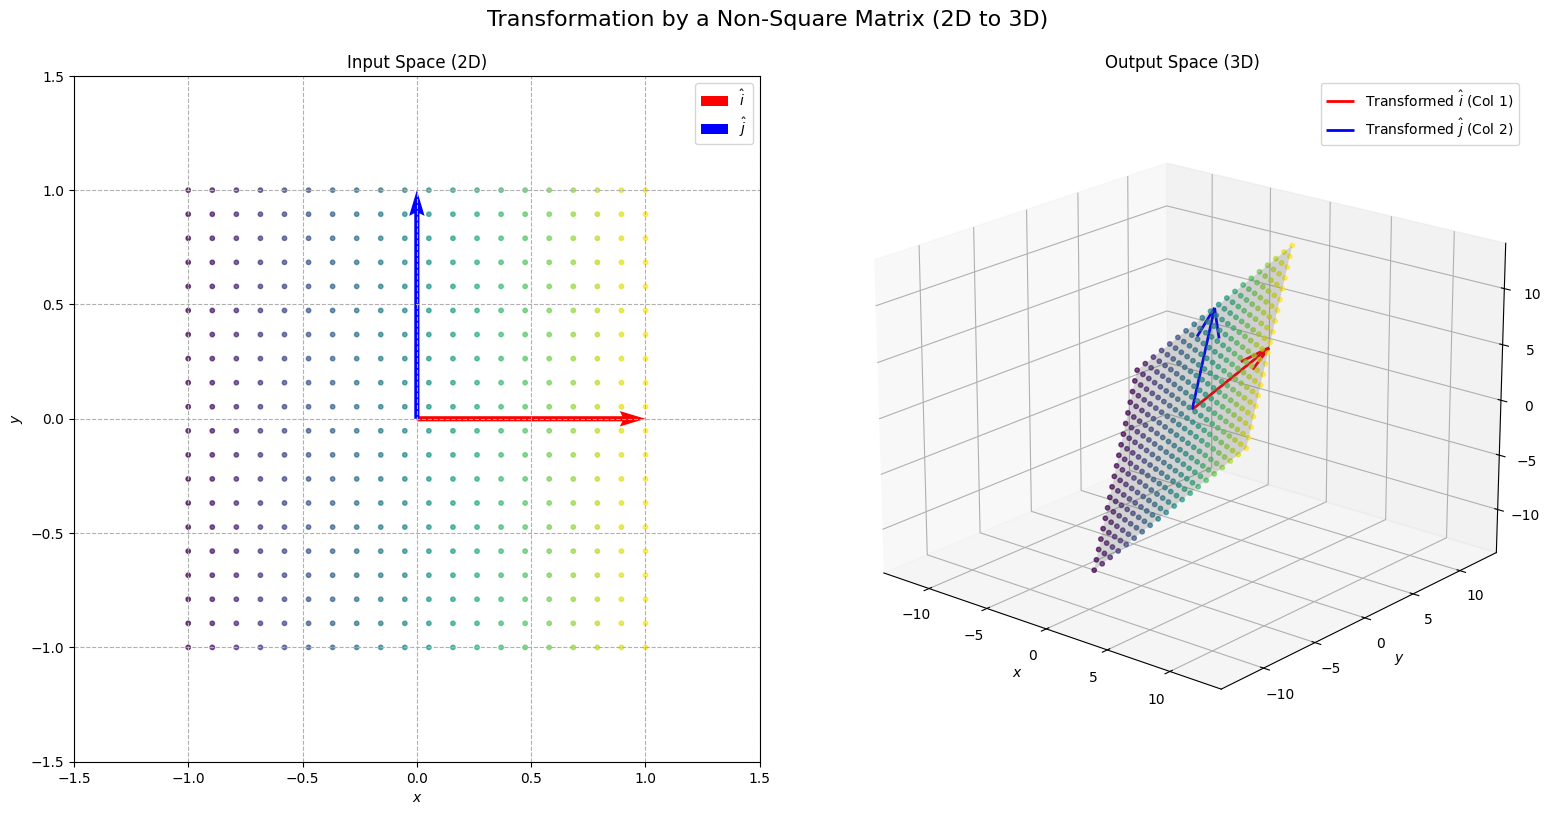

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Setup the Transformation ---

# Define the 3x2 matrix as described.
# This matrix maps 2D vectors to 3D vectors.
A = np.array([
    [3, 1],
    [4, 1],
    [5, 9]
])

# The columns of A are the vectors where the original basis vectors i_hat and j_hat land.
i_hat_transformed = A[:, 0]  # First column of A
j_hat_transformed = A[:, 1]  # Second column of A

# --- 2. Generate Input Data ---

# Create a grid of points in the 2D input space.
# We'll use these points to see where they land after the transformation.
# We create a grid of 20x20 points from -1 to 1 on both x and y axes.
steps = 20
x = np.linspace(-1, 1, steps)
y = np.linspace(-1, 1, steps)
xx, yy = np.meshgrid(x, y)
input_points = np.vstack([xx.ravel(), yy.ravel()]) # 2 * 400 matrix with all the 20 point between -1 and 1 having the point coordinate as columns

# --- 3. Apply the Transformation ---

# Apply the matrix A to every point in our 2D input grid.
# The '@' operator performs matrix multiplication.
# The result will be a set of 3D points.
output_points = A @ input_points # Same as output_points = np.matmul(A, input_points)

# --- 4. Visualization ---

# Create a figure to hold our plots. We'll show the "before" and "after".
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Transformation by a Non-Square Matrix (2D to 3D)', fontsize=16)

# --- Subplot 1: The 2D Input Space ---
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(input_points[0, :], input_points[1, :], s=10, c=input_points[0, :], cmap='viridis', alpha=0.7)
# Plot the original basis vectors i_hat and j_hat
ax1.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='r', label='$\\hat{i}$')
ax1.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='b', label='$\\hat{j}$')
ax1.set_title('Input Space (2D)')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_aspect('equal', adjustable='box')
ax1.grid(True, linestyle='--')
ax1.legend()

# --- Subplot 2: The 3D Output Space ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Plot the transformed points. These points form the column space of A.
ax2.scatter(output_points[0, :], output_points[1, :], output_points[2, :], s=10, c=input_points[0, :], cmap='viridis', alpha=0.7)

# To make the plane clearer, create a surface plot for the column space.
# The plane is the set of all linear combinations of the column vectors.
s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)
plane_x = S * i_hat_transformed[0] + T * j_hat_transformed[0]
plane_y = S * i_hat_transformed[1] + T * j_hat_transformed[1]
plane_z = S * i_hat_transformed[2] + T * j_hat_transformed[2]
ax2.plot_surface(plane_x, plane_y, plane_z, alpha=0.2, color='gray', rstride=1, cstride=1, edgecolor='none')


# Plot the transformed basis vectors (the columns of A).
ax2.quiver(0, 0, 0, i_hat_transformed[0], i_hat_transformed[1], i_hat_transformed[2],
           color='r', linewidth=2, label='Transformed $\\hat{i}$ (Col 1)')
ax2.quiver(0, 0, 0, j_hat_transformed[0], j_hat_transformed[1], j_hat_transformed[2],
           color='b', linewidth=2, label='Transformed $\\hat{j}$ (Col 2)')

ax2.set_title('Output Space (3D)')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_zlabel('$z$')

# Set the axis limits to be consistent and show the origin clearly
max_val = np.max(np.abs(output_points))
ax2.set_xlim([-max_val, max_val])
ax2.set_ylim([-max_val, max_val])
ax2.set_zlim([-max_val, max_val])

ax2.legend()
ax2.grid(True)

# Adjust the viewing angle for a better perspective
ax2.view_init(elev=20, azim=-50)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
